<a href="https://colab.research.google.com/github/uayoag/feco/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNDERSTAND DATASET**

The dataset consists of 11 columns, each column representing an attribute of purchase on a product

In this project, you will dig into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify top-selling products, calculate revenue metrics such as total sales and profit margins, and create visual charts to effectively present your results. This project demonstrates your ability to process and make inferences from large datasets, helping you make data-driven recommendations to optimize sales strategies.

# **IMPORT DATA**

In [77]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistics
from statistics import mean, stdev
from scipy.stats import ttest_1samp, norm, t
import statsmodels.stats.api as sms
from statsmodels.stats.weightstats import ztest, DescrStatsW
import statsmodels.api as sm

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

In [78]:
sales = pd.read_csv('drive/MyDrive/Datasets/sales/sales_data.csv')
sales.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


Dataset include 11 columns with informations:
*   **Order ID** - A unique ID for each order placed on a product
*   **Product** - Item that is purchased
*   **Quantity Ordered** - Describes how many of that products are ordered
*   **Price Each** - Price of a unit of that product
*   **Order Date** - Date on which the order is placed
*   **Purchase Address** - Address to where the order is shipped
*   **Month, Sales, City, Hour** - Extra attributes formed from the above.

# **DATA EXPLORATION AND CLEANING**

## **Check data type**

In [79]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


* Dataset has 185950 records taken from customer orders

## **Check for duplicate data**

In [104]:
sales.duplicated().sum()

0

* The data is not duplicated so no processing is required.

## **Check for missing data**

In [105]:
sales.isna().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


* There is no missing data in each column so no processing is required.

## **Check the constraints and data in each column**

### **Month column**

In [82]:
sales['Month'].unique()

array([12,  1,  4,  5,  2,  3,  8,  9,  6, 11, 10,  7])

*   We can see that the value in the **Month** column is numbered from 1-12, which makes it difficult to analyze. Therefore, we will change the data to category type for easier analysis.

In [83]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
              6: 'June', 7: 'July', 8: 'August', 9: 'September',
              10: 'October', 11: 'November', 12: 'December'}
sales['Month'] = sales['Month'].replace(month_dict)
sales['Month'] = sales['Month'].astype('category')
sales['Month']

,Month
0,December
1,December
2,December
3,December
4,December
...,...
185945,June
185946,June
185947,June
185948,June


In [84]:
sales.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",December,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",December,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",December,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",December,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",December,11.96,Dallas,11


### **Hour column**

In [85]:
sales['Hour'].unique()

array([ 0,  7, 18, 15, 12, 22,  9, 23, 11, 13, 17, 19, 14, 16,  1,  6, 10,
       20, 21,  8,  3,  5,  2,  4])

In [86]:
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Invalid'
sales['Time Period'] = sales['Hour'].apply(categorize_time)
sales[['Hour', 'Time Period']].head()

,Hour,Time Period
0,0,Night
1,7,Morning
2,18,Evening
3,15,Afternoon
4,12,Afternoon


In [87]:
sales.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time Period
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0,Night
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7,Morning
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18,Evening
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15,Afternoon
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12,Afternoon
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",December,3.84,New York City,22,Evening
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",December,11.95,Portland,15,Afternoon
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",December,23.90,Dallas,9,Morning
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",December,99.99,Dallas,23,Evening
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",December,11.96,Dallas,11,Morning


## **Quarter column**

In [88]:
def categorize_quarter(month):
    if month in ['January', 'February', 'March']:
        return 'Quarter 1'
    elif month in ['April', 'May', 'June']:
        return 'Quarter 2'
    elif month in ['July', 'August', 'September']:
        return 'Quarter 3'
    elif month in ['October', 'November', 'December']:
        return 'Quarter 4'
    else:
        return 'Invalid'
sales['Quarter'] = sales['Month'].apply(categorize_quarter)
sales[['Month', 'Quarter']].head()

,Month,Quarter
0,December,Quarter 4
1,December,Quarter 4
2,December,Quarter 4
3,December,Quarter 4
4,December,Quarter 4


# **DATA ANALYSIS**

## **Question 1: What was the best month for sales? How much was earned that month?**

In [89]:
monthly_sales = (sales['Sales']).groupby(sales['Month']).sum().sort_values(ascending=True)
monthly_sales

,Sales
Month,
January,1822256.73
September,2097560.13
February,2202022.42
August,2244467.88
June,2577802.26
July,2647775.76
March,2807100.38
May,3152606.75
November,3199603.20


In [90]:
# The best month for sales
best_month = monthly_sales.idxmax()
print("The best month for sales is",best_month)
# The total sales for the best month
best_month_sales = monthly_sales.max()
print("The total sales for the best month is",best_month_sales)

The best month for sales is December
The total sales for the best month is 4613443.34


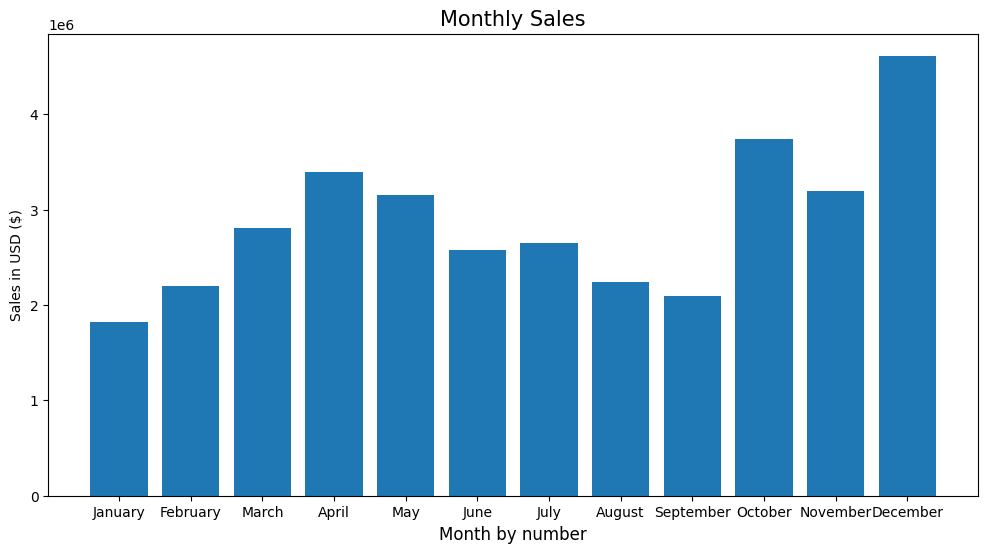

In [91]:
# Ensure 'Month' is sorted according to the sorted sales
sorted_months = monthly_sales.sort_values().index
sorted_months = monthly_sales.index.sort_values(key=lambda x: pd.to_datetime(x, format='%B').month)

# Create a bar plot of the sorted monthly sales
plt.figure(figsize=(12,6))
plt.bar(sorted_months, monthly_sales.loc[sorted_months])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month by number', fontsize=12)
plt.title('Monthly Sales', fontsize=15)
plt.show()


**NOTE:**
1. **`monthly_sales.index`**: Gets the index of `monthly_sales`, which in this case are the month names (like 'January', 'February', etc.).

2. **`.sort_values(...)`**: This method sorts the values ​​in the index based on a specific criteria.

3. **`key=lambda x: pd.to_datetime(x, format='%B').month`**:
- **`lambda x`**: This is an anonymous function that takes an argument `x`, where `x` is the name of the month.
- **`pd.to_datetime(x, format='%B')`**: Converts the month name `x` to a `datetime` object with the format `'%B'` (this is the format to read the full month name like 'January').

- **`.month`**: Extracts the month from a `datetime` object, returning the numeric value of the month (1 for January, 2 for February, etc.).

In [109]:
monthly_sales.describe()

,Sales
count,1.200000e+01
mean,2.874336e+06
std,7.931995e+05
min,1.822257e+06
25%,2.233857e+06
50%,2.727438e+06
75%,3.247370e+06
max,4.613443e+06


The best quarter for sales is Quarter 4
The total sales for the best quarter is 11549773.42


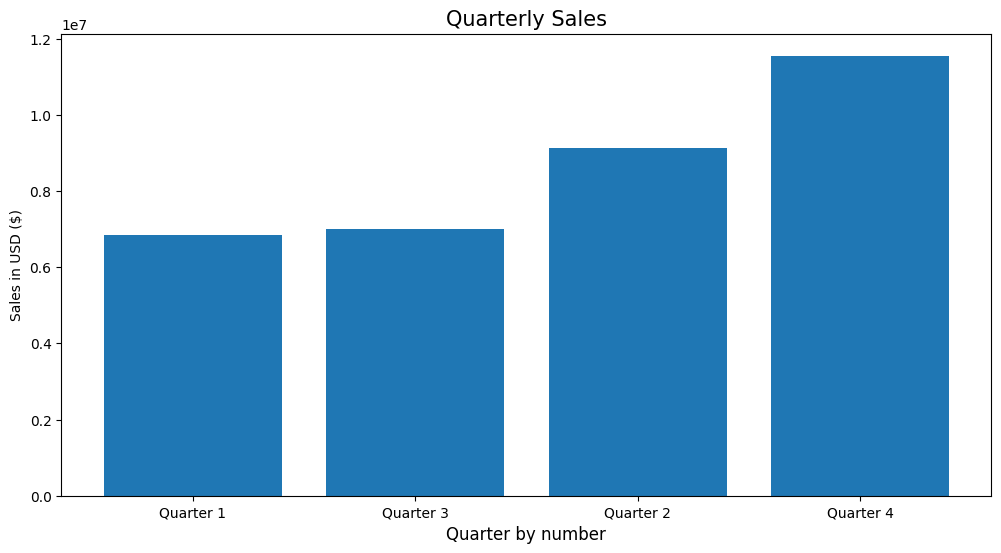

In [102]:
# The best quarter for sales
best_quarter = sales.groupby('Quarter')['Sales'].sum().idxmax()
print("The best quarter for sales is",best_quarter)
# The total sales for the best quarter
best_quarter_sales = sales.groupby('Quarter')['Sales'].sum().max()
print("The total sales for the best quarter is",best_quarter_sales)
# Ensure 'Month' is sorted according to the sorted sales
sorted_quarters = sales.groupby('Quarter')['Sales'].sum().sort_values().index
# Create a bar plot of the sorted monthly sales
plt.figure(figsize=(12,6))
plt.bar(sorted_quarters, sales.groupby('Quarter')['Sales'].sum().loc[sorted_quarters])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Quarter by number', fontsize=12)
plt.title('Quarterly Sales', fontsize=15)
plt.show()


## **Question 2: What city sold the most product?**

In [92]:
city_sales = sales.groupby('City').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).sort_values(by='Sales', ascending=True)
city_sales

,Quantity Ordered,Sales
City,,
Austin,11153,1819581.75
Portland,14053,2320490.61
Seattle,16553,2747755.48
Dallas,16730,2767975.40
Atlanta,16602,2795498.58
Boston,22528,3661642.01
New York City,27932,4664317.43
Los Angeles,33289,5452570.80
San Francisco,50239,8262203.91


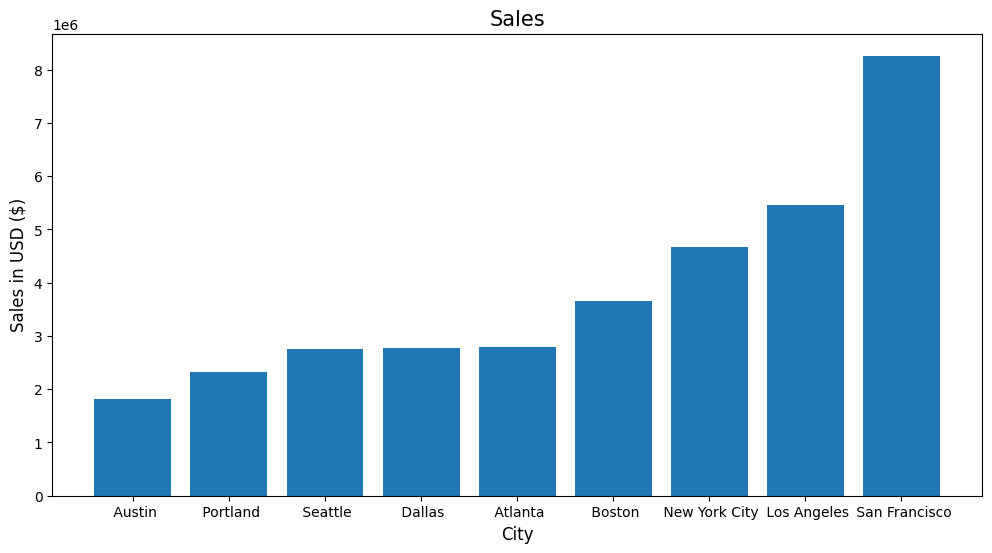

In [93]:
# Create a bar plot for city sales
plt.figure(figsize=(12,6))
plt.bar(city_sales.index, city_sales['Sales'])
plt.title('Sales', fontsize=15)
plt.ylabel('Sales in USD ($)', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

In [94]:
# Find the city with the highest sales
best_city = city_sales['Sales'].idxmax()
print("The best city for sales is:", best_city)

# Get the total sales for the best city
best_city_sales = city_sales['Sales'].max()
print("The total sales for the best city is:", best_city_sales)

The best city for sales is:  San Francisco
The total sales for the best city is: 8262203.91


## **Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

In [95]:
sales.groupby('Time Period').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).sort_values(by='Sales', ascending=True)

,Quantity Ordered,Sales
Time Period,,
Night,11803,1948538.31
Morning,50497,8269243.68
Evening,71248,11742857.59
Afternoon,75531,12531396.39


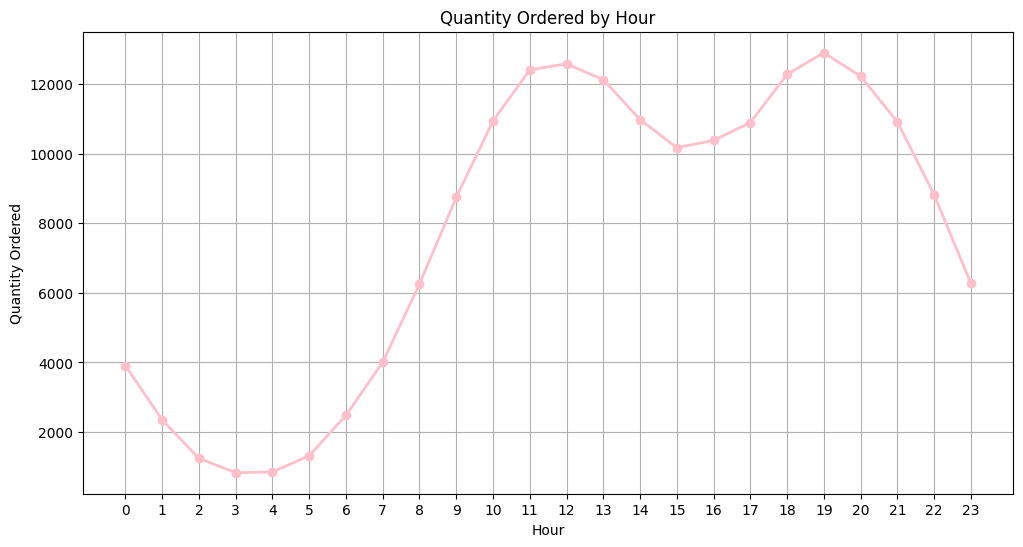

In [96]:
# Create a line chart for hours
sales['Hour'].value_counts().sort_index().plot(
    kind='line',
    figsize=(12,6),
    title='Quantity Ordered by Hour',
    xticks=range(0,24),
    xlabel='Hour',
    ylabel='Quantity Ordered',
    color='pink',
    marker='o',
    linestyle='-',
    linewidth=2,
    grid=True
)
plt.show()

## **Question 4: What product sold the most? Why do you think it sold the most?**

In [97]:
# What product sold the most?
product_sales = sales.groupby('Product').agg({'Quantity Ordered': 'sum', 'Sales': 'sum'}).sort_values(by='Sales', ascending=True)
product_sales

,Quantity Ordered,Sales
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
Wired Headphones,20557,246478.43
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
LG Dryer,646,387600.00
LG Washing Machine,666,399600.00
20in Monitor,4129,454148.71
Vareebadd Phone,2068,827200.00


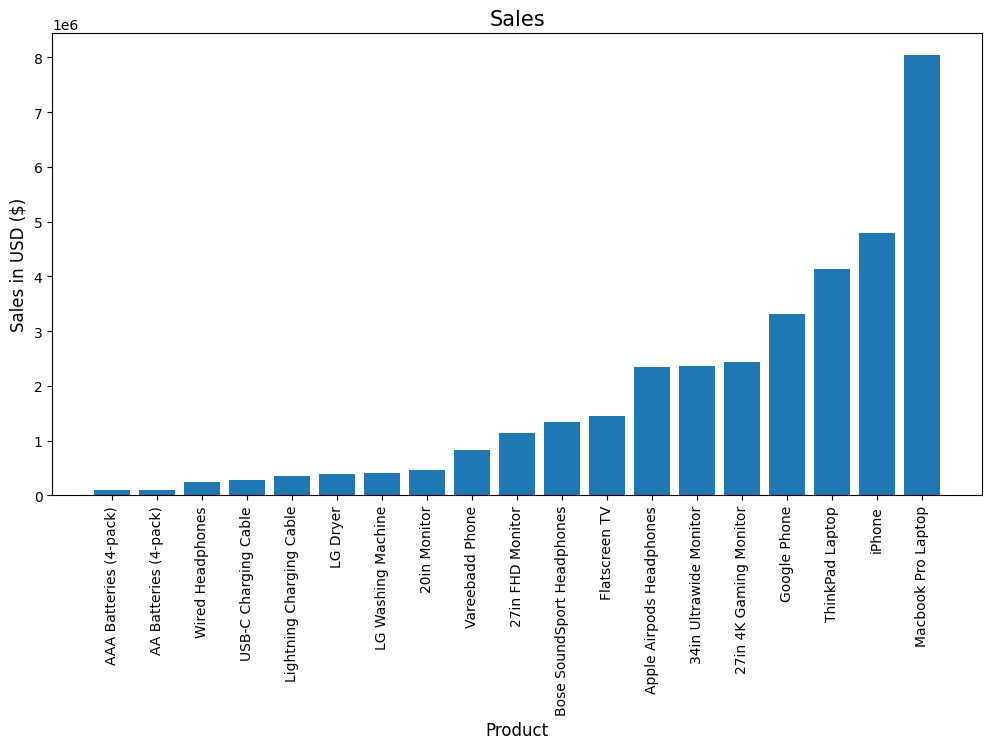

In [98]:
# Create a bar chart for Product
plt.figure(figsize=(12,6))
plt.bar(product_sales.index, product_sales['Sales'])
plt.title('Sales', fontsize=15)
plt.ylabel('Sales in USD ($)', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90) # chuyển nhãn chữ thành dọc
plt.show()

In [99]:
sales.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time Period,Quarter
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,0,Night,Quarter 4
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,7,Morning,Quarter 4
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18,Evening,Quarter 4
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15,Afternoon,Quarter 4
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12,Afternoon,Quarter 4
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",December,3.84,New York City,22,Evening,Quarter 4
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",December,11.95,Portland,15,Afternoon,Quarter 4
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",December,23.90,Dallas,9,Morning,Quarter 4
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",December,99.99,Dallas,23,Evening,Quarter 4
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",December,11.96,Dallas,11,Morning,Quarter 4
